In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Preparing Data**

In [3]:
from sklearn.preprocessing import StandardScaler

# Loading Train Dataset

our_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','SalePrice']
dataset = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
dataset = dataset[our_features].dropna().to_numpy()  # Covert DataFrame to numpy array

In [4]:
# Train/ Test split

X, y = dataset[:,:-1], dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

y_train = y_train.reshape(-1,1) # y_train as column vectors
y_test = y_test.reshape(-1,1) # y_test as column vectors

In [5]:
# Sacling the data

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

**Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score


# Train model

regr = LinearRegression()
regr.fit(X_train_scaled,y_train_scaled)

y_pred_scaled = regr.predict(X_test_scaled)
print('The mean-squared-error on the test data: ',mean_squared_error(y_test_scaled,y_pred_scaled))
print('R-squared of the fit: ',r2_score(y_test_scaled,y_pred_scaled))
print()

The mean-squared-error on the test data:  0.18603206350839405
R-squared of the fit:  0.7362759206661225



In [7]:
# Retrieve the cofficientes that define the model

print('The intercept and slops coefficients that define the model:')
print('Intercept: ',regr.intercept_)
print('Coefficients: ',regr.coef_)

The intercept and slops coefficients that define the model:
Intercept:  [2.95414471e-16]
Coefficients:  [[0.10557266 0.13455974 0.68028219 0.04316808 0.12375952]]


Best fit line: y =  -71875.81643886396 + 41269.471833301126 x


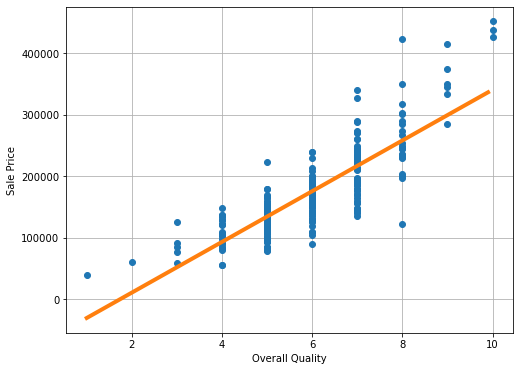

In [8]:
# Visualization

plt.figure(figsize = (8,6))
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(True)

# plot the test data using the most relavent features

plt.plot(X_test[:,2], y_test,'o')

# Convert Back to original scale and plot

intercept = scaler_y.mean_[0] - scaler_X.mean_[2] * regr.coef_[0][2] * scaler_y.scale_[0] / scaler_X.scale_[2]
slope = regr.coef_[0][2] * scaler_y.scale_[0] / scaler_X.scale_[2]
print('Best fit line: y = ', intercept, '+', slope, 'x')

xx = np.arange(1,10,.1)
yy = intercept + slope  * xx
plt.plot(xx,yy, linewidth = 4.0)
plt.show()

**Ridge Regression**

In [9]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha = 0)
regr.fit(X_train_scaled,y_train_scaled)

y_pred_scaled = regr.predict(X_test_scaled)

print('Intercept: ', regr.intercept_[0])
print('Slope: ', regr.coef_[0])
print('The mean Sqared Error on the test data: ', mean_squared_error(y_test_scaled, y_pred_scaled))
print('R-sqaured of the fit: ', r2_score(y_test_scaled, y_pred_scaled))


Intercept:  2.954144711297049e-16
Slope:  [0.10557266 0.13455974 0.68028219 0.04316808 0.12375952]
The mean Sqared Error on the test data:  0.18603206350839482
R-sqaured of the fit:  0.7362759206661214


**Lasso Regressor**

In [10]:
from sklearn.linear_model import Lasso

#train the model
regr = Lasso(alpha=0.1)
regr.fit(X_train_scaled,y_train_scaled)

#make a prediction
y_pred_scaled = regr.predict(X_test_scaled)

#retrieve parameters of the model and evaluate the fit
print('Intercept: ',regr.intercept_[0])
print('Slope: ',regr.coef_)
print('The mean-squared-error on the test data: ',mean_squared_error(y_test_scaled,y_pred_scaled))
print('R-squared of the fit: ',r2_score(y_test_scaled,y_pred_scaled))

Intercept:  1.0044136291952721e-16
Slope:  [ 0.0510187   0.06467139  0.65555499 -0.          0.03090961]
The mean-squared-error on the test data:  0.1995180955894013
R-squared of the fit:  0.7171577572304398


** Ridge Vs Lasso Regresssor
**

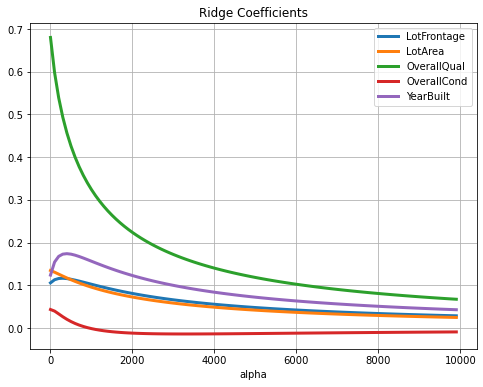

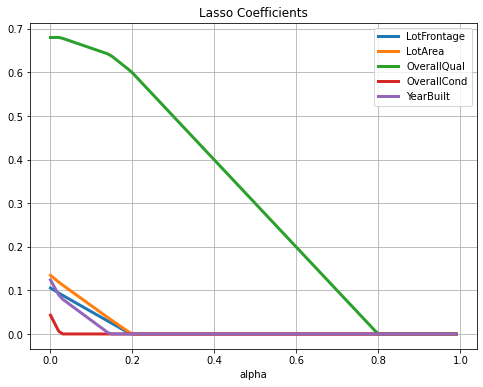

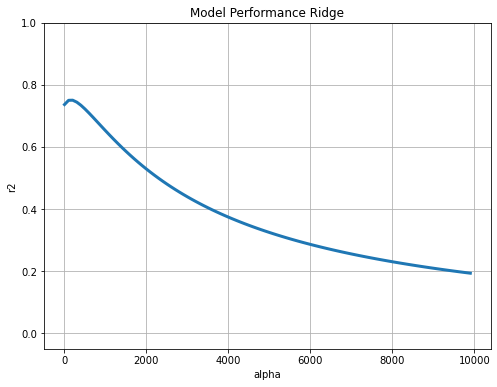

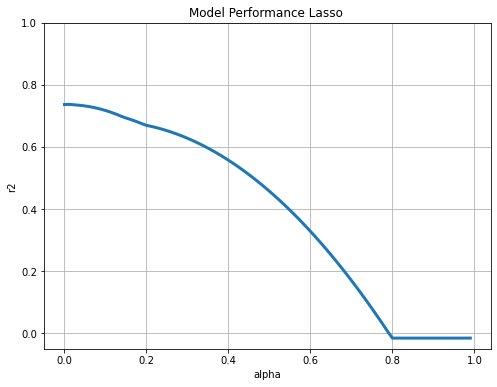

In [11]:
# It's insructive to see how each model behaves as the function of Regularization parameter
# Plot the coefficients and R^2 as function of alpha


#the range of parameters we test for ridge regression
alpha_max_r = 10000.0
step_r = 100
alpha_grid_r = np.arange(0.00001, alpha_max_r, step_r)

#the range of parameters we test for lasso regression
alpha_max_l = 1.0
step_l = .01
alpha_grid_l = np.arange(0.00001, alpha_max_l, step_l)

#create some lists to store the coefficients and r^2 values
coef_grid_r = []
r2_grid_r = []

coef_grid_l = []
r2_grid_l = []

#iterate through the allowed values of alpha, train a model for each, and store that models values for the coefficients and for R^2
#do this once for ridge
for alpha in alpha_grid_r:    
    regr = Ridge(alpha=alpha)
    regr.fit(X_train_scaled,y_train_scaled)
    
    y_pred_scaled = regr.predict(X_test_scaled)
    coef_grid_r.append(regr.coef_.tolist()[0])
    r2_grid_r.append(r2_score(y_test_scaled,y_pred_scaled))

#and once for lasso
for alpha in alpha_grid_l:    
    regr = Lasso(alpha=alpha)
    regr.fit(X_train_scaled,y_train_scaled)
    
    y_pred_scaled = regr.predict(X_test_scaled)
    coef_grid_l.append(regr.coef_)
    r2_grid_l.append(r2_score(y_test_scaled,y_pred_scaled))

#now we make some plots to demonstrate the behavior of the coefficients and R^2 as a function of alpha for both ridge and lasso regression
#parameters for the plots
linewidth = 3.0
figsize = (8,6)

#coefficients vs. alpha for Ridge
plt.figure(figsize=figsize)
plt.plot(alpha_grid_r,coef_grid_r,linewidth=linewidth)
plt.xlabel('alpha')
plt.title('Ridge Coefficients')
plt.legend(our_features);
plt.grid(True)
plt.show()

#coefficients vs. alpha for Lasso
plt.figure(figsize=figsize)
plt.plot(alpha_grid_l,coef_grid_l,linewidth=linewidth)
plt.xlabel('alpha')
plt.title('Lasso Coefficients')
plt.legend(our_features);
plt.grid(True)
plt.show()

#R^2 vs alpha for Ridge
plt.figure(figsize=figsize)
plt.plot(alpha_grid_r,r2_grid_r,linewidth=linewidth)
plt.ylim(-0.05,1)
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title('Model Performance Ridge')
plt.grid(True)
plt.show()

#R^2 vs alpha for Lasso
plt.figure(figsize=figsize)
plt.plot(alpha_grid_l,r2_grid_l,linewidth=linewidth)
plt.ylim(-0.05,1)
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title('Model Performance Lasso ')
plt.grid(True)
plt.show()

Lasso parameter alpha:  0.2
The Coefficients:  [ 0.         0.         0.5990595 -0.         0.       ]
The R-squared score:  0.6693280518097087

Best fit line: y = -41495.36166695412 + 36342.07927019361 x


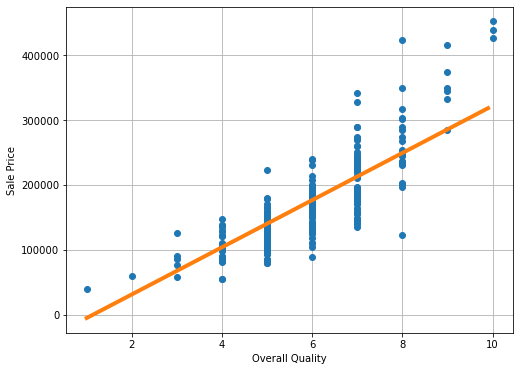

In [12]:
# training the lasso regressor at a value of alpha large enought to result in a simple model, but small enough to not underfit

alpha = 0.2
regr = Lasso(alpha=alpha)
regr.fit(X_train_scaled,y_train_scaled)
    
#use it to make some predictions, retrieve its coefficients, and evaluate its performance

y_pred_scaled = regr.predict(X_test_scaled)
print('Lasso parameter alpha: ',alpha)
print('The Coefficients: ',regr.coef_)
print('The R-squared score: ',r2_score(y_test_scaled,y_pred_scaled))
print()

#set up the plot

plt.figure(figsize=(8,6))
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(True)

#plot the test data

plt.plot(X_test[:,2],y_test,'o')

#convert linear model back to original scale and plot

intercept = scaler_y.mean_[0] - scaler_X.mean_[2] * regr.coef_[2] * scaler_y.scale_[0] / scaler_X.scale_[2]
slope = regr.coef_[2] * scaler_y.scale_[0] / scaler_X.scale_[2]
print('Best fit line: y =',intercept,'+',slope,'x')

xx = np.arange(1,10,.1)
yy = intercept + slope * xx
plt.plot(xx,yy,linewidth=4.0)
plt.show()

**Decision Tree Regression**

In [13]:
from sklearn.tree import DecisionTreeRegressor

#train the model
tree = DecisionTreeRegressor(criterion='mse',min_impurity_decrease=.05)
tree.fit(X_train_scaled,y_train_scaled)

#make predictions and evaluate our results
y_pred_scaled = tree.predict(X_test_scaled)
print('The mean-squared-error on the test data: ',mean_squared_error(y_test_scaled,y_pred_scaled))
print('R-squared of the fit: ',r2_score(y_test_scaled,y_pred_scaled))
print()


The mean-squared-error on the test data:  0.25048686633896605
R-squared of the fit:  0.6449030507717227



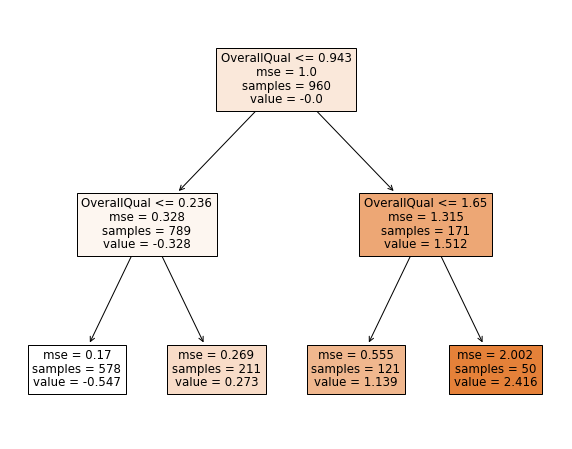

In [14]:
# as well as displaying them 

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10,8))
plot_tree(tree, 
            feature_names=our_features, 
            filled=True)
plt.show()

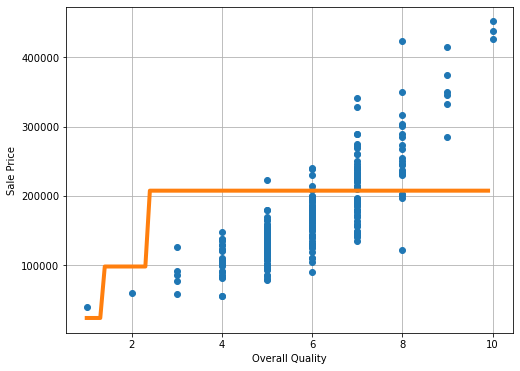

In [15]:
#set up the plot
plt.figure(figsize=(8,6))
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(True)

#plot the test data
plt.plot(X_test[:,2],y_test,'o')


xx = np.arange(1,10,.1)
zeros = np.zeros(len(xx)).reshape(-1,1)
graph_x = np.concatenate((zeros,zeros,xx.reshape(-1,1),zeros,zeros),axis=1)
yy = scaler_y.scale_[0] * tree.predict( graph_x / scaler_X.scale_[2])
plt.plot(xx,yy,linewidth=4.0)
plt.show()

**Random Forest Regression**

In [16]:
from sklearn.ensemble import RandomForestRegressor 

regr = RandomForestRegressor(n_estimators = 100,
                            criterion = 'mse',
                             max_samples = 0.3,
                            max_features = 3,
                            min_samples_leaf = 3,
                            random_state = 0)
regr.fit(X_train, y_train)

# Making Predictions and evaluating preformance
y_pred = regr.predict(X_test)
print('The Mean-squared-error: ', mean_squared_error(y_test, y_pred))
print('The r-sqaured value: ', r2_score(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


The Mean-squared-error:  1068789554.9614059
The r-sqaured value:  0.7944383786554998


**Support vector Regression**

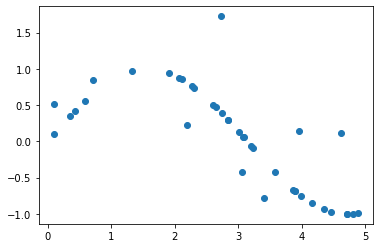

In [17]:
# Genrate Sample Data

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

#plot
plt.scatter(X,y)
plt.show()

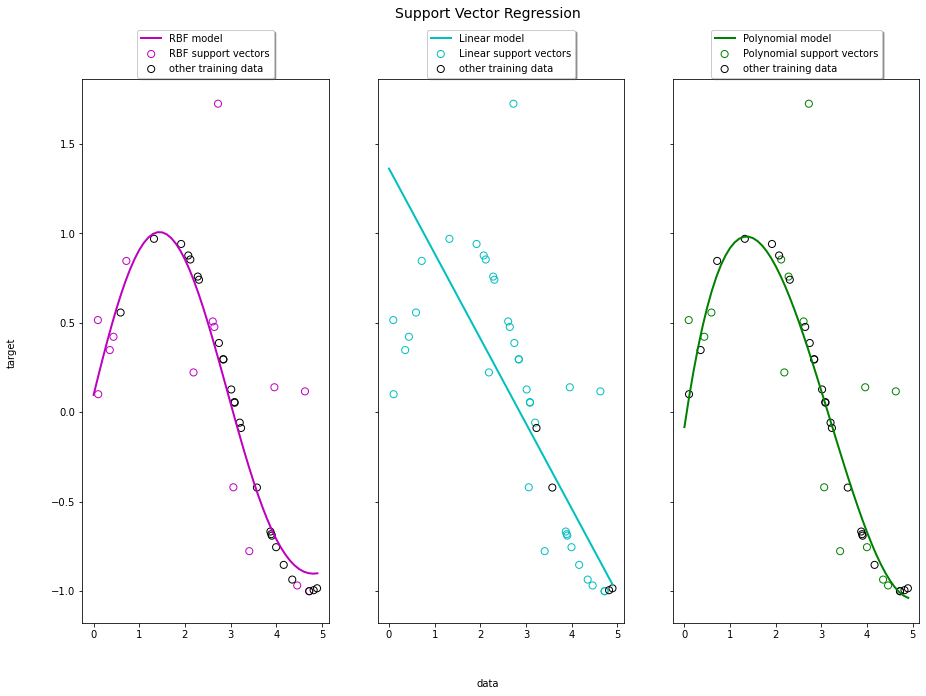

In [18]:
# Fit regression model
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100,epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

x = np.arange(0,5,0.1).reshape(-1,1)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(x, svr.fit(X, y).predict(x), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

**XGboost Regression**

In [19]:
from xgboost import XGBRegressor

regr = XGBRegressor(n_estimators=100,learning_rate=0.1,reg_lambda=20,min_split_loss=0)
eval_set=[(X_train,y_train),(X_test,y_test)]
regr.fit(X_train,y_train,
        eval_metric=['rmse','mae'],eval_set=eval_set,verbose=False)

# Eval_set is provided for cross validation across the training and test sets
# eval_matric then specifies which measures of error we want to keep track of 

#now lets make some predictions on the test set and see how they fare
y_pred = regr.predict(X_test)
print('MSE on the test set data:',mean_squared_error(y_test, y_pred))
print('R-squared on the test set data:',r2_score(y_test, y_pred))

MSE on the test set data: 1043739927.1068535
R-squared on the test set data: 0.7992562046643291


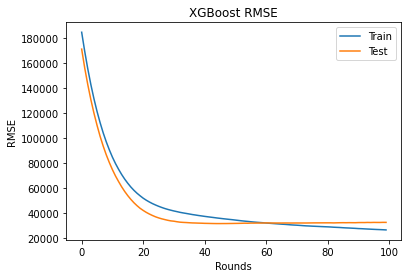

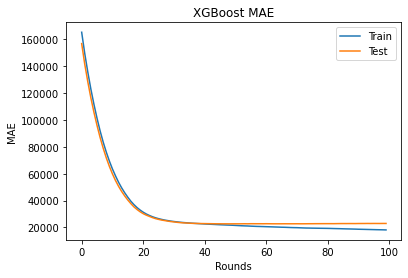

In [20]:
# retrieve performance metrics
results = regr.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot RMSE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.xlabel('Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

# plot error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.xlabel('Rounds')
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()